##Importing packages

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

drive.mount('/content/drive')

Mounted at /content/drive


# Data Collection

In [3]:
data_crash= pd.read_csv('/content/drive/MyDrive/Crash_Data_(SOR) (3).csv')
data_vehicle = pd.read_csv('/content/drive/MyDrive/Crash_Vehicle_Data_(SOR).csv')

<ipython-input-3-fd21e385e185>:1: DtypeWarning: Columns (43,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_crash= pd.read_csv('/content/drive/MyDrive/Crash_Data_(SOR) (3).csv')
<ipython-input-3-fd21e385e185>:2: DtypeWarning: Columns (49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data_vehicle = pd.read_csv('/content/drive/MyDrive/Crash_Vehicle_Data_(SOR).csv')


In [4]:
data_merge = data_crash.merge(data_vehicle,on='CASENUMBER')

In [5]:
print(data_vehicle.shape)
print(data_crash.shape)
print(data_merge.shape)

(1382636, 55)
(743584, 50)
(1279820, 104)


In [6]:
data_merge['FATALITIES'] = data_merge['FATALITIES_x'].apply(lambda x: (1 if x>1 else x))

In [7]:
data_merge['FATALITIES'].value_counts(normalize=True)

0    0.99388
1    0.00612
Name: FATALITIES, dtype: float64

In [8]:
data_merge = data_merge[[ "CARGOBODY","CHARGED","CRCOMNNR","CSEV","CSEVERITY","CSURFCOND","DAMAGE","DCONTCIRC1","DCONTCIRC2","DRUGALC","DRUGALCREL","DRUGTEST","ECNTCRC",
                          "FIXOBJSTR","FROM_MEASURE","FRSTHARM","INJURIES","LOCFSTHRM",'MAJINJURY', 'MAJORCAUSE', 'MAKE', 'MININJURY', 'MOSTDAMAGE', 'MOSTHARM','OCCUPANTS', 'PAVED', 'POSSINJURY', 'PROPDMG', 'RCNTCRC',
                          "ROADTYPE",'SEQEVENTS1', 'SEQEVENTS2', 'SEQEVENTS3', 'SEQEVENTS4', 'STYLE','SYSTEMSTR', 'TIMESTR', 'TO_MEASURE', 'TRAFCONT', 'UNKINJURY', 'VACTION', 'VEHICLES','VISIONOBS', 'VLP_STATE', 'WZRELATED','XCOORD_x', 'XCOORD_y', 'YCOORD_x', 'YCOORD_y',
 'FATALITIES','MAJCSE','LIGHT','WEATHER','CSRFCND','RDTYP','TOCCUPANTS','CITY_NAME','CRASH_DAY','CRASH_MONTH','CARDINAL','DRIVERAGE','DRIVERGEN','DRUGRESULT','ALCRESULT','VCONFIG','DRIVERCOND','VYEAR','MODEL','SPEEDLIMIT','WZ_RELATED']]

In [9]:
pd.set_option('display.max_columns', 500)
data_merge.head()


,CARGOBODY,CHARGED,CRCOMNNR,CSEV,CSEVERITY,CSURFCOND,DAMAGE,DCONTCIRC1,DCONTCIRC2,DRUGALC,DRUGALCREL,DRUGTEST,ECNTCRC,FIXOBJSTR,FROM_MEASURE,FRSTHARM,INJURIES,LOCFSTHRM,MAJINJURY,MAJORCAUSE,MAKE,MININJURY,MOSTDAMAGE,MOSTHARM,OCCUPANTS,PAVED,POSSINJURY,PROPDMG,RCNTCRC,ROADTYPE,SEQEVENTS1,SEQEVENTS2,SEQEVENTS3,SEQEVENTS4,STYLE,SYSTEMSTR,TIMESTR,TO_MEASURE,TRAFCONT,UNKINJURY,VACTION,VEHICLES,VISIONOBS,VLP_STATE,WZRELATED,XCOORD_x,XCOORD_y,YCOORD_x,YCOORD_y,FATALITIES,MAJCSE,LIGHT,WEATHER,CSRFCND,RDTYP,TOCCUPANTS,CITY_NAME,CRASH_DAY,CRASH_MONTH,CARDINAL,DRIVERAGE,DRIVERGEN,DRUGRESULT,ALCRESULT,VCONFIG,DRIVERCOND,VYEAR,MODEL,SPEEDLIMIT,WZ_RELATED
0,1,1.0,5,4,4,1,5,1.0,77.0,8,8,1.0,1,28,NaN,33,1,1,0,2,Jeep,0,12,33,2,1,1,18000.0,1,12,33,77,77.0,77.0,WAGON 4 DOOR,NaN,13:11,NaN,2.0,0,1,2,1.0,IA,NaN,554004,554004,4703715,4703715,0,2,1,2,1,12,4,NaN,5,1,NaN,56.0,M,77.0,0.0,3,1.0,2002,Liberty Spor,30.0,NaN
1,1,77.0,5,4,4,1,5,97.0,99.0,8,8,1.0,1,28,NaN,33,1,1,0,2,Chry,0,12,33,2,1,1,18000.0,1,12,33,77,77.0,77.0,PILLARD HARD,NaN,13:11,NaN,2.0,0,1,2,1.0,IA,NaN,554004,554004,4703715,4703715,0,2,1,2,1,12,4,NaN,5,1,NaN,27.0,F,77.0,0.0,1,1.0,1998,Sebring LXI,30.0,NaN
2,1,77.0,3,2,2,3,4,5.0,77.0,8,8,1.0,2,28,NaN,33,2,1,2,20,Dodg,0,12,33,1,1,0,10000.0,2,1,77,32,77.0,33.0,SPORT VAN,US 169,17:00,NaN,1.0,0,1,4,1.0,IA,NaN,414481,414481,4622465,4622465,0,20,5,6,3,1,5,NaN,7,1,NaN,44.0,M,77.0,0.0,4,1.0,1997,Grand Carava,55.0,NaN
3,1,77.0,3,2,2,3,3,88.0,77.0,8,8,1.0,2,28,NaN,33,2,1,2,20,Olds,0,8,33,1,1,0,10000.0,2,1,33,77,77.0,77.0,EXTENDED SPO,US 169,17:00,NaN,1.0,0,98,4,1.0,IA,NaN,414481,414481,4622465,4622465,0,20,5,6,3,1,5,NaN,7,1,NaN,46.0,M,77.0,0.0,4,1.0,2001,Silhouette L,55.0,NaN
4,1,77.0,3,2,2,3,2,88.0,77.0,8,8,1.0,2,28,NaN,33,2,1,2,20,Ford,0,9,33,2,1,0,10000.0,2,1,33,77,77.0,77.0,4 DOOR EXT C,US 169,17:00,NaN,1.0,0,1,4,1.0,IA,NaN,414481,414481,4622465,4622465,0,20,5,6,3,1,5,NaN,7,1,NaN,34.0,M,77.0,0.0,2,1.0,1999,F350 Super D,55.0,NaN


In [10]:
x_data = data_merge.loc[:, 'FATALITIES']
x_data

0          0
1          0
2          0
3          0
4          0
          ..
1279815    0
1279816    0
1279817    0
1279818    0
1279819    0
Name: FATALITIES, Length: 1279820, dtype: int64

In [11]:
X = data_merge.drop("FATALITIES", axis=1)
X

,CARGOBODY,CHARGED,CRCOMNNR,CSEV,CSEVERITY,CSURFCOND,DAMAGE,DCONTCIRC1,DCONTCIRC2,DRUGALC,DRUGALCREL,DRUGTEST,ECNTCRC,FIXOBJSTR,FROM_MEASURE,FRSTHARM,INJURIES,LOCFSTHRM,MAJINJURY,MAJORCAUSE,MAKE,MININJURY,MOSTDAMAGE,MOSTHARM,OCCUPANTS,PAVED,POSSINJURY,PROPDMG,RCNTCRC,ROADTYPE,SEQEVENTS1,SEQEVENTS2,SEQEVENTS3,SEQEVENTS4,STYLE,SYSTEMSTR,TIMESTR,TO_MEASURE,TRAFCONT,UNKINJURY,VACTION,VEHICLES,VISIONOBS,VLP_STATE,WZRELATED,XCOORD_x,XCOORD_y,YCOORD_x,YCOORD_y,MAJCSE,LIGHT,WEATHER,CSRFCND,RDTYP,TOCCUPANTS,CITY_NAME,CRASH_DAY,CRASH_MONTH,CARDINAL,DRIVERAGE,DRIVERGEN,DRUGRESULT,ALCRESULT,VCONFIG,DRIVERCOND,VYEAR,MODEL,SPEEDLIMIT,WZ_RELATED
0,1,1.0,5,4,4,1,5,1.0,77.0,8,8,1.0,1,28,NaN,33,1,1,0,2,Jeep,0,12,33,2,1,1,18000.0,1,12,33,77,77.0,77.0,WAGON 4 DOOR,NaN,13:11,NaN,2.0,0,1,2,1.0,IA,NaN,554004,554004,4703715,4703715,2,1,2,1,12,4,NaN,5,1,NaN,56.0,M,77.0,0.0,3,1.0,2002,Liberty Spor,30.0,NaN
1,1,77.0,5,4,4,1,5,97.0,99.0,8,8,1.0,1,28,NaN,33,1,1,0,2,Chry,0,12,33,2,1,1,18000.0,1,12,33,77,77.0,77.0,PILLARD HARD,NaN,13:11,NaN,2.0,0,1,2,1.0,IA,NaN,554004,554004,4703715,4703715,2,1,2,1,12,4,NaN,5,1,NaN,27.0,F,77.0,0.0,1,1.0,1998,Sebring LXI,30.0,NaN
2,1,77.0,3,2,2,3,4,5.0,77.0,8,8,1.0,2,28,NaN,33,2,1,2,20,Dodg,0,12,33,1,1,0,10000.0,2,1,77,32,77.0,33.0,SPORT VAN,US 169,17:00,NaN,1.0,0,1,4,1.0,IA,NaN,414481,414481,4622465,4622465,20,5,6,3,1,5,NaN,7,1,NaN,44.0,M,77.0,0.0,4,1.0,1997,Grand Carava,55.0,NaN
3,1,77.0,3,2,2,3,3,88.0,77.0,8,8,1.0,2,28,NaN,33,2,1,2,20,Olds,0,8,33,1,1,0,10000.0,2,1,33,77,77.0,77.0,EXTENDED SPO,US 169,17:00,NaN,1.0,0,98,4,1.0,IA,NaN,414481,414481,4622465,4622465,20,5,6,3,1,5,NaN,7,1,NaN,46.0,M,77.0,0.0,4,1.0,2001,Silhouette L,55.0,NaN
4,1,77.0,3,2,2,3,2,88.0,77.0,8,8,1.0,2,28,NaN,33,2,1,2,20,Ford,0,9,33,2,1,0,10000.0,2,1,33,77,77.0,77.0,4 DOOR EXT C,US 169,17:00,NaN,1.0,0,1,4,1.0,IA,NaN,414481,414481,4622465,4622465,20,5,6,3,1,5,NaN,7,1,NaN,34.0,M,77.0,0.0,2,1.0,1999,F350 Super D,55.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279815,1,77.0,2,5,5,3,4,88.0,77.0,8,8,1.0,2,28,NaN,33,0,1,0,9,Chev,0,12,33,1,2,0,7500.0,1,13,33,77,77.0,77.0,PICKUP,NaN,08:00,NaN,1.0,0,1,2,1.0,IA,NaN,607904,607904,4635265,4635265,9,1,6,3,13,2,NaN,6,12,9999.0,25.0,M,77.0,0.0,2,1.0,1995,S10,55.0,NaN
1279816,1,77.0,1,5,5,1,4,18.0,77.0,8,8,1.0,1,9,NaN,48,0,1,0,46,Olds,0,12,48,1,1,0,3000.0,1,1,48,77,77.0,77.0,SEDAN,IA 1,19:50,NaN,1.0,0,1,1,1.0,IA,NaN,626315,626315,4619072,4619072,46,4,1,1,1,1,NaN,6,12,3.0,70.0,M,77.0,0.0,1,1.0,1978,NR,55.0,NaN
1279817,1,77.0,1,5,5,3,4,99.0,77.0,8,8,1.0,1,5,NaN,44,0,2,0,43,Chev,0,9,44,1,2,0,6500.0,2,1,2,44,77.0,77.0,WAGON 4 DOOR,NaN,00:10,NaN,99.0,0,1,1,1.0,IA,NaN,635665,635665,4631906,4631906,43,5,1,3,1,1,NaN,1,12,9999.0,35.0,F,77.0,0.0,3,1.0,2010,Equinox Lt A,50.0,NaN
1279818,1,77.0,6,5,5,4,5,5.0,77.0,8,8,1.0,2,28,NaN,33,0,2,0,20,Ford,0,12,33,1,1,0,10000.0,2,1,3,6,33.0,77.0,SEDAN 4 DOOR,I-380,18:21,NaN,1.0,0,1,2,1.0,IA,NaN,612893,612893,4621485,4621485,20,5,7,4,1,2,NaN,2,12,3.0,18.0,F,77.0,0.0,1,1.0,2002,Taurus SES,65.0,NaN


## Sampling

In [13]:
print("The Number of Samples in the dataset: ", len(data_merge))
print('Class 0        :', round(data_merge['FATALITIES'].value_counts()[0]
                                / len(data_merge) * 100, 2), '% of the dataset')

print('Class 1(Fraud) :', round(data_merge['FATALITIES'].value_counts()[1]
                                / len(data_merge) * 100, 2), '% of the dataset')

The Number of Samples in the dataset:  1279820
Class 0        : 99.39 % of the dataset
Class 1(Fraud) : 0.61 % of the dataset


In [14]:

X_data = data_merge.drop("FATALITIES", axis=1)
y_data = data_merge["FATALITIES"]
ros = RandomOverSampler(random_state=42)

X_res, y_res = ros.fit_resample(X_data, y_data)

X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(y_res)


print("After Over Sampling Of Minor Class\
              Total Samples are :", len(Y_res))
print('Class 0        :', round(Y_res.value_counts()\
                  [0] / len(Y_res) * 100, 2), '% of the dataset')
print('Class 1(Fraud) :', round(Y_res.value_counts()\
                    [1] / len(Y_res) * 100, 2), '% of the dataset')
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

After Over Sampling Of Minor Class              Total Samples are : 2543974
Class 0        : 50.0 % of the dataset
Class 1(Fraud) : 50.0 % of the dataset


In [15]:
train_data = X_train.merge(y_train.to_frame(), left_index=True, right_index=True)

## Data Imputation

In [16]:
train_data['DRIVERAGE'] = train_data['DRIVERAGE'].replace([200,10,5,0,153,6,7,8,9,11,12,13],np.nan)

In [17]:
print(train_data.isnull().sum()*100/len(train_data))

CARGOBODY      0.000000
CHARGED        0.809926
CRCOMNNR       0.000000
CSEV           0.000000
CSEVERITY      0.000000
                ...    
VYEAR          0.000000
MODEL          0.001572
SPEEDLIMIT     0.006177
WZ_RELATED    98.060289
FATALITIES     0.000000
Length: 70, dtype: float64


deleting columns(FROM_MEASURE, TO_MEASURE,SYSTEMSTR, WZRELATED,WZ_RELATED,CRASH_DATETIME_y) as more than 60% of values in those columns are null values

In [18]:
train_data = train_data.drop(['FROM_MEASURE','TO_MEASURE','SYSTEMSTR','WZRELATED','WZ_RELATED',],axis=1)

In order to eliminate missing values I used Simple imputer method and imputed the missing values with median and most frequency approach, as the data in the reqiuired columns is skewed we use Median instead of mean

In [19]:
char_imputer = SimpleImputer(strategy = 'most_frequent',missing_values=np.nan)
var = ['CHARGED','DCONTCIRC1','DCONTCIRC2','DRUGTEST','MAKE','SEQEVENTS3','SEQEVENTS4','STYLE','TRAFCONT','VISIONOBS','VLP_STATE','CITY_NAME','CARDINAL','DRIVERGEN','DRUGRESULT','DRIVERCOND','MODEL','SPEEDLIMIT']
char_imputer = char_imputer.fit(train_data[var])
train_data[var] = char_imputer.transform(train_data[var])

In [20]:
num_imputer = SimpleImputer(strategy = 'median',missing_values=np.nan)
num_imputer = num_imputer.fit(train_data[['DRIVERAGE','ALCRESULT']])
train_data[['DRIVERAGE','ALCRESULT']] = num_imputer.transform(train_data[['DRIVERAGE','ALCRESULT']])


In [21]:
print(train_data.isnull().sum()*100/len(train_data))

CARGOBODY     0.0
CHARGED       0.0
CRCOMNNR      0.0
CSEV          0.0
CSEVERITY     0.0
             ... 
DRIVERCOND    0.0
VYEAR         0.0
MODEL         0.0
SPEEDLIMIT    0.0
FATALITIES    0.0
Length: 65, dtype: float64


In [22]:
pd.set_option('display.max_rows', 500)
n=train_data.nunique(axis=0)
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 CARGOBODY          23
CHARGED             2
CRCOMNNR           12
CSEV                5
CSEVERITY           5
CSURFCOND          13
DAMAGE              7
DCONTCIRC1         49
DCONTCIRC2         48
DRUGALC             8
DRUGALCREL          8
DRUGTEST            7
ECNTCRC            10
FIXOBJSTR          28
FRSTHARM           66
INJURIES           23
LOCFSTHRM          12
MAJINJURY           9
MAJORCAUSE         73
MAKE             1440
MININJURY          16
MOSTDAMAGE         20
MOSTHARM           66
OCCUPANTS          68
PAVED               3
POSSINJURY         18
PROPDMG         10549
RCNTCRC            17
ROADTYPE           26
SEQEVENTS1         66
SEQEVENTS2         66
SEQEVENTS3         65
SEQEVENTS4         65
STYLE            4936
TIMESTR          1440
TRAFCONT           16
UNKINJURY           7
VACTION            21
VEHICLES           24
VISIONOBS          21
VLP_STATE          91
XCOORD_x       218398
XCOORD_y       218398
YCOORD_x       1

In [23]:
def worktime(x):
  x = x.split(":")
  x = int(x[0])
  if x > 7 and x <10:
    return 'work hour'
  elif x >16 and x < 19:
    return 'work hour'
  else:
    return 'other'


train_data['TIMESTR']=train_data['TIMESTR'].apply(worktime)

In [24]:
def var_group(data, variable,levels,names):
  data[variable][~data[variable].isin(levels)] = names[-1]
  for i in range(len(levels)):
    data[variable] = data[variable].replace(levels[i], names[i])

In [25]:
var_group(train_data, 'CRCOMNNR',[3,5,1,6],['front-rear','front-side','single vehicle','same direction','other'])
var_group(train_data, 'CSEVERITY',[5,4,1],['property damage only','unknown','fatal','injury'])
var_group(train_data, 'CSURFCOND',[1,2,4,3,5],['dry','wet','snow','snow','snow','other'])
var_group(train_data, 'DAMAGE',[2,3,4,5],['minor damage','functional damage','disabling damage','severe','other'])
var_group(train_data, 'DCONTCIRC1',[88,6,7,5,40,41,42,43,44,45,46,47,97],['No proper action','Lost Control','Followed too close','Driving too fast for conditions','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','other'])
var_group(train_data, 'ECNTCRC',[1,2,6],['None Apparent','Weather Conditions','Animal in Roadway','other'])
var_group(train_data, 'FRSTHARM',[33,31,35,44],['Vehicle in Traffic','Animal','Parked Motor Vehicle','Ditch','Other'])
var_group(train_data, 'INJURIES',[0,1,2],['No Injuries','One Injury','Two Injuries','Other'])
var_group(train_data, 'MAJORCAUSE',[24,1,4,5,6,7,8,9,10,11,12,13,45,20,2,3,42,43,44,30,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41],['Followed too close','Animal','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW',
                                                          'Lost Control','Driving too fast for conditions','Ran Signal','Ran Stop sign','Ran Off Road','Ran Off Road','Ran Off Road',
                                                          'Made improper turn','Passing','Passing','Passing','Passing','Passing','Driver Distraction','Driver Distraction',
                                                          'Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Other'])
var_group(train_data, 'MAKE',['NR','Ford','FORD','FOR','Chev','CHEV','Chevrolet','Dodg','DODG','Dodge','GMC','TOYT','Toyo','Toyota','TOYO','TAOT','HOND','Hond','Honda','HD',
                  'Pont','PONT','Pontiac','KIA','Jeep','JEEP','JEP','BUIC','Buic','Buick','NISS','Nissan','Niss','NISN','Chry','CHRY','Chrysler',
                  'Hyun','Hyundai','HYUN','Merc','MERC','Mercedes-ben','SUBA','Subaru','Suba','VOLK','Volkswagen','VOL','MAZD','Mazd','Mazda',
                  'Volvo','Volv','VOLV','LEXS','Lexu','LEXU','Lexus'],
          ['NR','Ford','Ford','Ford','Chevrolet','Chevrolet','Chevrolet','Dodge','Dodge','Dodge','GMC','Toyota','Toyota','Toyota','Toyota','Toyota','Honda','Honda','Honda','Honda',
           'Pontiac','Pontiac','Pontiac','KIA','Jeep','Jeep','Jeep','Buick','Buick','Buick','Nissan','Nissan','Nissan','Nissan','Chrysler','Chrysler','Chrysler',
           'Hyundai','Hyundai','Hyundai','Mercedes-benz','Mercedes-benz','Mercedes-benz','Subaru','Subaru','Subaru','Volkswagen','Volkswagen','Volkswagen',
           'Mazda','Mazda','Mazda','Volvo','Volvo','Volvo','Lexus','Lexus','Lexus','Lexus','Other'])
var_group(train_data, 'MOSTDAMAGE',[12,6,7,8,9,10,11,1,2,3,4,5],['Front','Rear','Driver Side','Driver Side','Driver Side','Driver Side','Driver Side',
                                                     'Passenger Side','Passenger Side','Passenger Side','Passenger Side','Passenger Side','Other'])
var_group(train_data, 'MOSTHARM',[33,35,31,20,44],['Vehicle in Traffic','Parked Motor Vehicle','Animal','Over Turn','Ditch','Other'])
var_group(train_data, 'POSSINJURY',[0,1,2],['No Injuries','One Injury','Two Injuries','Other'])
var_group(train_data, 'RCNTCRC',[1,2],['None Apparent','Surface Condition','Other'])
var_group(train_data, 'ROADTYPE',[1,2,3,4,5,6,7,96,12,13],['Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection',
                                         'Four Way Intersection','Other'])
var_group(train_data, 'SEQEVENTS1',[33],['Vehicle in Traffic','Other'])
var_group(train_data, 'TRAFCONT',[1,2,4],['No signs present','Traffic signals','Stop Signs','Other'])
var_group(train_data, 'VACTION',[1,2,3,4,6,10,11,12],['Moving straight','Turning','Turning','Turning','Turning','stop','stop','stop','Other'])
var_group(train_data, 'LIGHT',[1,4,5,6],['Daylight','Dark','Dark','Dark','Other'])
var_group(train_data, 'CRASH_DAY',[1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
var_group(train_data, 'CRASH_MONTH',[1,2,3,4,5,6,7,8,9,10,11],['January','February','March','April','May','June','July','August','September','October','November',"december"])
var_group(train_data, 'WEATHER',[1,2,5],['Clear','Cloudy','Cloudy','Other'])
var_group(train_data, 'VCONFIG',[1,4,3,2],['Passenger Car','Passenger Car','Sport Utility Vehicle','Four-Tire Truck','Other'])
var_group(train_data, 'SPEEDLIMIT',[20,25,30,35,40,45,50,55,60,65,70],['20-45','20-45','20-45','20-45','20-45','20-45','50-70','50-70','50-70','50-70','50-70','Other'])

<ipython-input-24-a649efb2eed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable][~data[variable].isin(levels)] = names[-1]
<ipython-input-24-a649efb2eed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable][~data[variable].isin(levels)] = names[-1]
<ipython-input-24-a649efb2eed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable][~data[variable].isin(levels)] = names[-1]
<ipython-input-24-a649efb

In [26]:
train_data = train_data.drop(['CARGOBODY','DCONTCIRC2','DRUGALC','CSEV','DRUGALCREL','DRUGTEST','FIXOBJSTR','LOCFSTHRM','MAJINJURY','MININJURY','PAVED','SEQEVENTS2','SEQEVENTS3','SEQEVENTS4','STYLE','UNKINJURY',
                              'XCOORD_x','XCOORD_y','YCOORD_x','YCOORD_y','VISIONOBS','CARDINAL','CHARGED','DRUGRESULT','DRIVERCOND','MODEL',
'MAJCSE','CSRFCND','RDTYP','VLP_STATE','CITY_NAME'],axis=1)


1. removing columns as they have 90% unique value - CARGOBODY,DCONTCIRC2,DRUGALC,DRUGALCREL,DRUGTEST,FIXOBJSTR,LOCFSTHRM,MAJINJURY,MININJURY,PAVED,SEQEVENTS2,SEQEVENTS3,SEQEVENTS4,STYLE,UNKINJURY,XCOORD_x,XCOORD_y,YCOORD_x,YCOORD_y,VISIONOBS, CARDINAL, DRUGRESULT, DRIVERCOND,MODEL, VLP_STATE, CITY_NAME
2. removing columns as they are corelated with other variables - MAJCSE, CSRFCND,RDTYP

In [27]:
cat_vars = [ 'CRCOMNNR','CSEVERITY','CSURFCOND','DAMAGE','ECNTCRC', 'FRSTHARM','INJURIES',
            'MAJORCAUSE', 'MOSTDAMAGE','MOSTHARM', 'POSSINJURY','RCNTCRC','SEQEVENTS1','ROADTYPE',
            'VACTION', 'LIGHT', 'WEATHER','CRASH_DAY', 'CRASH_MONTH','VCONFIG', 'DCONTCIRC1', 'MAKE',
             'TRAFCONT','DRIVERGEN','SPEEDLIMIT','TIMESTR','FATALITIES']
num_cars = ['PROPDMG','OCCUPANTS','VEHICLES','TOCCUPANTS','DRIVERAGE', 'ALCRESULT','VYEAR','FATALITIES']


## Exploratory data analysis and statistical tests

In [28]:
model = ols('FATALITIES~PROPDMG+OCCUPANTS+VEHICLES+TOCCUPANTS+DRIVERAGE+ALCRESULT+VYEAR',data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
PROPDMG,48260.151278,1.0,242361.311289,0.000000e+00
OCCUPANTS,127.321921,1.0,639.407605,4.761857e-141
VEHICLES,31498.702689,1.0,158185.722287,0.000000e+00
TOCCUPANTS,201.128921,1.0,1010.064572,1.345565e-221
DRIVERAGE,1359.510441,1.0,6827.428520,0.000000e+00
ALCRESULT,15437.979108,1.0,77529.157309,0.000000e+00
VYEAR,699.544130,1.0,3513.093683,0.000000e+00
Residual,354596.094212,1780773.0,NaN,NaN


In [29]:
df_cat = train_data[cat_vars]
df_cat

,CRCOMNNR,CSEVERITY,CSURFCOND,DAMAGE,ECNTCRC,FRSTHARM,INJURIES,MAJORCAUSE,MOSTDAMAGE,MOSTHARM,POSSINJURY,RCNTCRC,SEQEVENTS1,ROADTYPE,VACTION,LIGHT,WEATHER,CRASH_DAY,CRASH_MONTH,VCONFIG,DCONTCIRC1,MAKE,TRAFCONT,DRIVERGEN,SPEEDLIMIT,TIMESTR,FATALITIES
1013775,same direction,injury,dry,disabling damage,None Apparent,Vehicle in Traffic,One Injury,Other,Driver Side,Vehicle in Traffic,No Injuries,None Apparent,Other,Four Way Intersection,stop,Dark,Clear,Friday,January,Passenger Car,No proper action,Dodge,Stop Signs,NR,20-45,other,0
2418224,single vehicle,fatal,wet,severe,None Apparent,Other,One Injury,Ran Off Road,Front,Other,No Injuries,None Apparent,Other,Non Intersection,Moving straight,Daylight,Cloudy,Tuesday,November,Passenger Car,Lost Control,Nissan,No signs present,M,50-70,work hour,1
2063633,front-rear,fatal,snow,disabling damage,None Apparent,Parked Motor Vehicle,No Injuries,Other,Passenger Side,Other,No Injuries,Surface Condition,Other,Four Way Intersection,Moving straight,Daylight,Cloudy,Thursday,January,Sport Utility Vehicle,Lost Control,Chevrolet,Traffic signals,F,20-45,other,1
722394,front-rear,property damage only,dry,minor damage,None Apparent,Vehicle in Traffic,No Injuries,Driving too fast for conditions,Rear,Vehicle in Traffic,No Injuries,Other,Vehicle in Traffic,Four Way Intersection,Moving straight,Daylight,Clear,Monday,January,Sport Utility Vehicle,No proper action,Ford,Traffic signals,F,20-45,other,0
2016479,front-side,fatal,dry,severe,None Apparent,Vehicle in Traffic,One Injury,Ran Stop sign,Front,Vehicle in Traffic,One Injury,None Apparent,Vehicle in Traffic,Four Way Intersection,Moving straight,Daylight,Clear,Friday,May,Passenger Car,other,Chevrolet,Stop Signs,F,50-70,work hour,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,front-side,property damage only,dry,other,None Apparent,Vehicle in Traffic,No Injuries,Ran Stop sign,Front,Vehicle in Traffic,No Injuries,None Apparent,Vehicle in Traffic,Four Way Intersection,Moving straight,Daylight,Clear,Saturday,August,Four-Tire Truck,other,Dodge,Stop Signs,NR,20-45,work hour,0
1692743,other,fatal,dry,minor damage,None Apparent,Vehicle in Traffic,No Injuries,FTYROW,Passenger Side,Vehicle in Traffic,No Injuries,None Apparent,Vehicle in Traffic,Four Way Intersection,Turning,Daylight,Cloudy,Tuesday,June,Four-Tire Truck,FTYROW,Ford,Traffic signals,M,20-45,work hour,1
2356330,front-rear,fatal,snow,disabling damage,Weather Conditions,Vehicle in Traffic,Other,Other,Rear,Vehicle in Traffic,Other,Surface Condition,Other,Non Intersection,Moving straight,Daylight,Other,Monday,January,Other,other,NR,No signs present,M,50-70,other,1
2229084,other,fatal,dry,severe,None Apparent,Vehicle in Traffic,Other,Other,Front,Vehicle in Traffic,No Injuries,None Apparent,Other,Non Intersection,Moving straight,Dark,Clear,Friday,July,Passenger Car,other,NR,No signs present,M,50-70,other,1


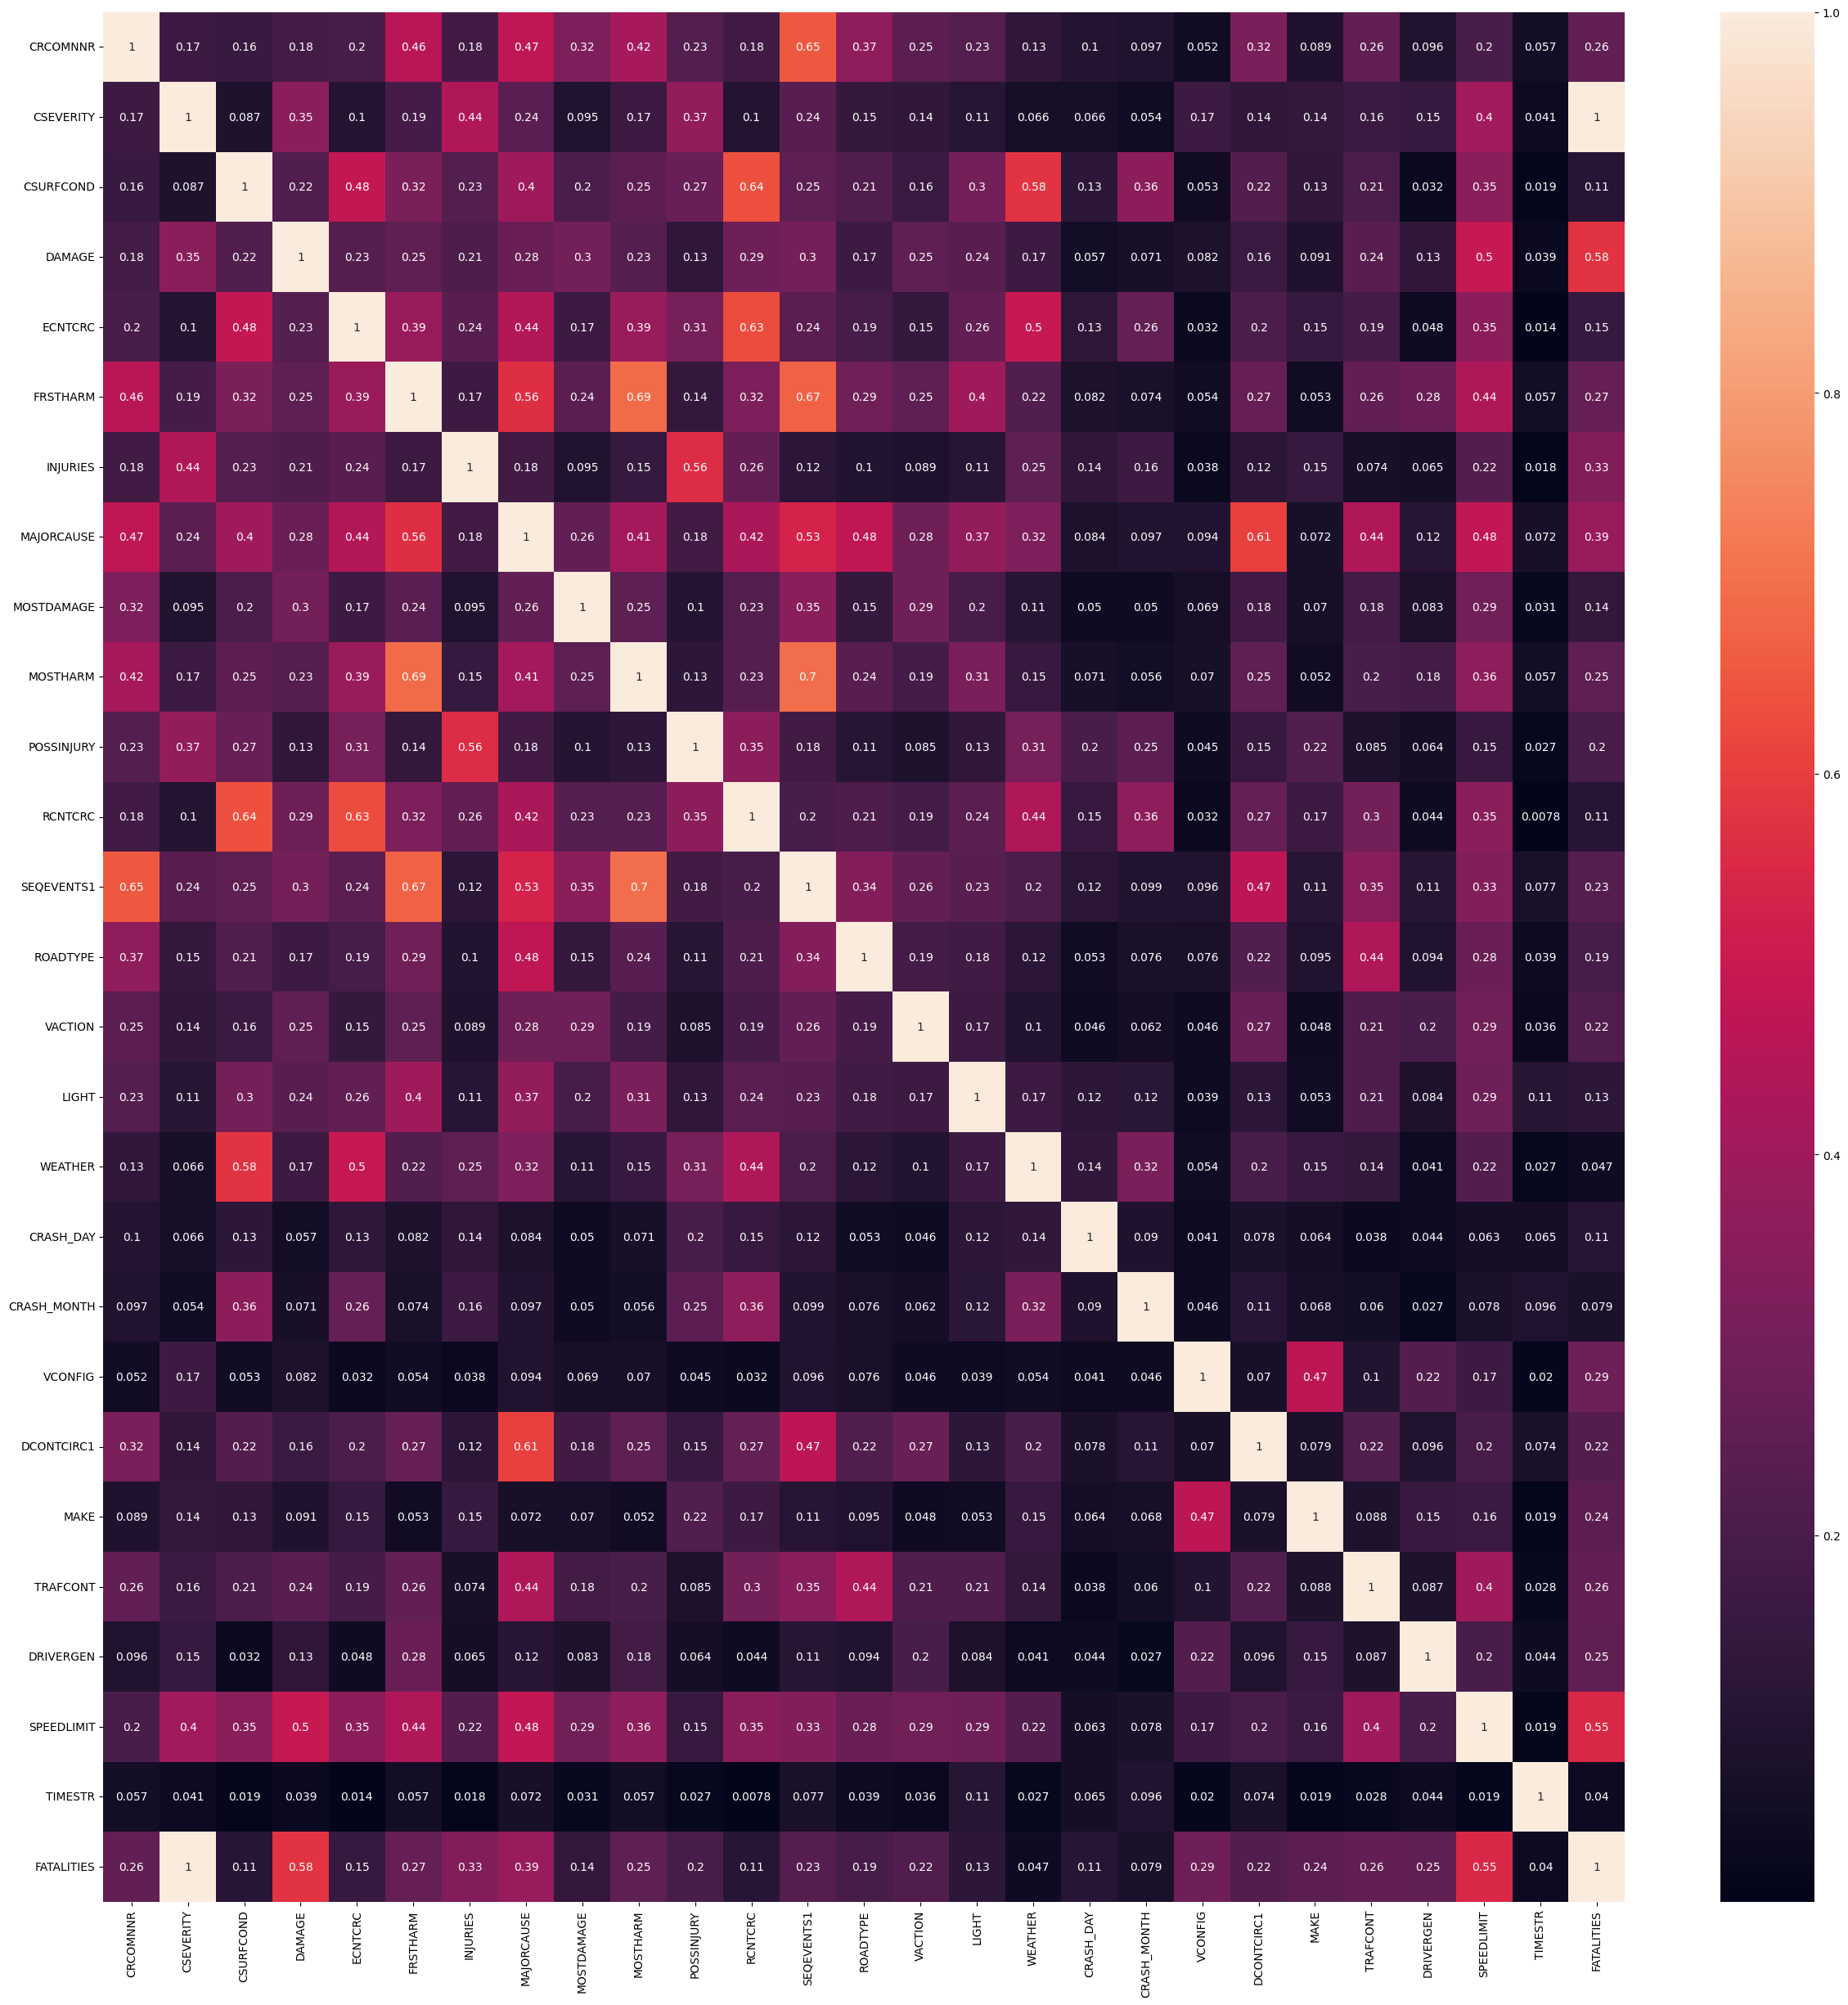

In [30]:
from itertools import combinations
from scipy.stats import chi2_contingency
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def get_corr_mat(df, f=chi2_contingency):
        columns = df.columns
        dm = pd.DataFrame(index=columns, columns=columns)
        for var1, var2 in combinations(columns, 2):
            cont_table = pd.crosstab(df[var1], df[var2], margins=False)
            chi2_stat = cramers_v(cont_table.values)
            dm.loc[var2, var1] = chi2_stat
            dm.loc[var1, var2] = chi2_stat
        dm.fillna(1, inplace=True)
        return dm

def cramers_v(confusion_matrix):
        """ calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher,
            Journal of the Korean Statistical Society 42 (2013): 323-328
        """
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        p_value = ss.chi2_contingency(confusion_matrix)[1]
        if p_value < 0.05:
          n = confusion_matrix.sum()
          phi2 = chi2 / n
          r, k = confusion_matrix.shape
          phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
          rcorr = r - ((r-1)**2)/(n-1)
          kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
cat_corr= get_corr_mat(df_cat)
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cat_corr, annot = True)
plt.show()

In [31]:
train_data = train_data.drop(['CRCOMNNR','CSEVERITY','SEQEVENTS1','INJURIES','RCNTCRC','WEATHER','FRSTHARM','DCONTCIRC1','POSSINJURY','MAJORCAUSE','OCCUPANTS', 'VYEAR'],axis=1)


In [32]:
train_data.shape

(1780781, 22)

In [33]:
scaler = MinMaxScaler()

train_data[['PROPDMG',	'VEHICLES',	'TOCCUPANTS',	'DRIVERAGE',	'ALCRESULT']] = scaler.fit_transform(train_data[['PROPDMG',	'VEHICLES',	'TOCCUPANTS',	'DRIVERAGE',	'ALCRESULT']])

In [34]:
one_hot_df = pd.get_dummies(train_data,
                            prefix={'CSURFCOND':'CSURFCOND','DAMAGE':'DAMAGE','ECNTCRC':'ECNTCRC','MOSTDAMAGE':'MOSTDAMAGE','MOSTHARM':'MOSTHARM','ROADTYPE':'ROADTYPE',
                                    'VACTION':'VACTION','LIGHT':'LIGHT','CRASH_DAY':'CRASH_DAY','CRASH_MONTH':'CRASH_MONTH','VCONFIG':'VCONFIG','MAKE':'MAKE',
                                    'TRAFCONT':'TRAFCONT','DRIVERGEN':'DRIVERGEN','SPEEDLIMIT':'SPEEDLIMIT','TIMESTR':'TIMESTR'},
                            columns = ['CSURFCOND','DAMAGE','ECNTCRC','MOSTDAMAGE','MOSTHARM','ROADTYPE','VACTION', 'LIGHT','CRASH_DAY',
                                        'CRASH_MONTH','VCONFIG', 'MAKE','TRAFCONT','DRIVERGEN','SPEEDLIMIT','TIMESTR'],drop_first=False)

In [35]:
pd.set_option('display.max_columns', 500)
one_hot_df.head()

,PROPDMG,VEHICLES,TOCCUPANTS,DRIVERAGE,ALCRESULT,FATALITIES,CSURFCOND_dry,CSURFCOND_other,CSURFCOND_snow,CSURFCOND_wet,DAMAGE_disabling damage,DAMAGE_functional damage,DAMAGE_minor damage,DAMAGE_other,DAMAGE_severe,ECNTCRC_Animal in Roadway,ECNTCRC_None Apparent,ECNTCRC_Weather Conditions,ECNTCRC_other,MOSTDAMAGE_Driver Side,MOSTDAMAGE_Front,MOSTDAMAGE_Other,MOSTDAMAGE_Passenger Side,MOSTDAMAGE_Rear,MOSTHARM_Animal,MOSTHARM_Ditch,MOSTHARM_Other,MOSTHARM_Over Turn,MOSTHARM_Parked Motor Vehicle,MOSTHARM_Vehicle in Traffic,ROADTYPE_Four Way Intersection,ROADTYPE_Non Intersection,ROADTYPE_Other,VACTION_Moving straight,VACTION_Other,VACTION_Turning,VACTION_stop,LIGHT_Dark,LIGHT_Daylight,LIGHT_Other,CRASH_DAY_Friday,CRASH_DAY_Monday,CRASH_DAY_Saturday,CRASH_DAY_Sunday,CRASH_DAY_Thursday,CRASH_DAY_Tuesday,CRASH_DAY_Wednesday,CRASH_MONTH_April,CRASH_MONTH_August,CRASH_MONTH_February,CRASH_MONTH_January,CRASH_MONTH_July,CRASH_MONTH_June,CRASH_MONTH_March,CRASH_MONTH_May,CRASH_MONTH_November,CRASH_MONTH_October,CRASH_MONTH_September,CRASH_MONTH_december,VCONFIG_Four-Tire Truck,VCONFIG_Other,VCONFIG_Passenger Car,VCONFIG_Sport Utility Vehicle,MAKE_Buick,MAKE_Chevrolet,MAKE_Chrysler,MAKE_Dodge,MAKE_Ford,MAKE_GMC,MAKE_Honda,MAKE_Hyundai,MAKE_Jeep,MAKE_KIA,MAKE_Lexus,MAKE_Mazda,MAKE_Mercedes-benz,MAKE_NR,MAKE_Nissan,MAKE_Other,MAKE_Pontiac,MAKE_Subaru,MAKE_Toyota,MAKE_Volkswagen,MAKE_Volvo,TRAFCONT_No signs present,TRAFCONT_Other,TRAFCONT_Stop Signs,TRAFCONT_Traffic signals,DRIVERGEN_F,DRIVERGEN_M,DRIVERGEN_NR,DRIVERGEN_U,SPEEDLIMIT_20-45,SPEEDLIMIT_50-70,SPEEDLIMIT_Other,TIMESTR_other,TIMESTR_work hour
1013775,0.001197,0.018868,0.001287,0.310345,0.39996,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2418224,0.003990,0.000000,0.002574,0.781609,0.39996,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2063633,0.001995,0.018868,1.000000,0.091954,0.00000,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
722394,0.003392,0.037736,0.005148,0.172414,0.39996,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
2016479,0.003990,0.018868,0.005148,0.873563,0.00000,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1


In [36]:
one_hot_df.shape

(1780781, 97)

In [ ]:
%matplotlib inline
X = one_hot_df.drop("FATALITIES", axis=1)
#X_c = X.astype(str).astype(float)
y = one_hot_df["FATALITIES"]
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,one_hot_df.columns[0:len(one_hot_df.columns)-1])
feat_importances.plot(kind='bar',color='red')
plt.xticks(rotation=90)
plt.show()



In [ ]:
X.columns

In [ ]:
pd.set_option('display.max_rows', 100)
feat_importances.sort_values(ascending=False)

## Modeling

In [37]:


embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1",solver='liblinear'), max_features=25)
X = one_hot_df.drop("FATALITIES", axis=1)
y = one_hot_df["FATALITIES"]
embeded_lr_selector.fit(X, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
embeded_lr_feature

25 selected features


['PROPDMG',
 'VEHICLES',
 'TOCCUPANTS',
 'DRIVERAGE',
 'ALCRESULT',
 'CSURFCOND_snow',
 'DAMAGE_disabling damage',
 'DAMAGE_functional damage',
 'DAMAGE_minor damage',
 'DAMAGE_other',
 'DAMAGE_severe',
 'ECNTCRC_Animal in Roadway',
 'MOSTDAMAGE_Rear',
 'MOSTHARM_Animal',
 'MOSTHARM_Ditch',
 'MOSTHARM_Parked Motor Vehicle',
 'LIGHT_Dark',
 'VCONFIG_Other',
 'VCONFIG_Passenger Car',
 'MAKE_Lexus',
 'MAKE_Volvo',
 'TRAFCONT_Traffic signals',
 'DRIVERGEN_U',
 'SPEEDLIMIT_50-70',
 'SPEEDLIMIT_Other']

In [38]:
final_vars = ['ECNTCRC_Animal in Roadway', 'SPEEDLIMIT_Other', 'LIGHT_Dark', 'MOSTHARM_Parked Motor Vehicle', 'MAKE_Volvo', 'ALCRESULT', 'ROADTYPE_Other', 'ROADTYPE_Four Way Intersection', 'VCONFIG_Other' , 'DRIVERGEN_F'
, 'VEHICLES','PROPDMG','TOCCUPANTS','DRIVERAGE','ALCRESULT']

In [39]:
one_hot_df_train = one_hot_df[final_vars]

In [40]:

model = LogisticRegression(solver='lbfgs',penalty='none', max_iter=1000)
model.fit(one_hot_df_train, one_hot_df['FATALITIES'])
predicted_classes = model.predict(one_hot_df_train)
accuracy = accuracy_score( one_hot_df['FATALITIES'],predicted_classes)
parameters = model.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [41]:
print(accuracy)

0.8215552614274299


## Checking the model performance on test data

In [42]:
test_data = X_test.merge(y_test.to_frame(), left_index=True, right_index=True)

In [43]:
test_data['DRIVERAGE'] = test_data['DRIVERAGE'].replace([200,10,5,0,153,6,7,8,9,11,12,13],np.nan)

In [44]:
test_data = test_data.drop(['FROM_MEASURE','TO_MEASURE','SYSTEMSTR','WZRELATED','WZ_RELATED',],axis=1)

In [45]:
var = ['CHARGED','DCONTCIRC1','DCONTCIRC2','DRUGTEST','MAKE','SEQEVENTS3','SEQEVENTS4','STYLE','TRAFCONT','VISIONOBS','VLP_STATE','CITY_NAME','CARDINAL','DRIVERGEN','DRUGRESULT','DRIVERCOND','MODEL','SPEEDLIMIT']
test_data[var] = char_imputer.transform(test_data[var])

test_data[['DRIVERAGE','ALCRESULT']] = num_imputer.transform(test_data[['DRIVERAGE','ALCRESULT']])

In [46]:
test_data['TIMESTR']=test_data['TIMESTR'].apply(worktime)

In [47]:
var_group(test_data, 'CRCOMNNR',[3,5,1,6],['front-rear','front-side','single vehicle','same direction','other'])
var_group(test_data, 'CSEVERITY',[5,4,1],['property damage only','unknown','fatal','injury'])
var_group(test_data, 'CSURFCOND',[1,2,4,3,5],['dry','wet','snow','snow','snow','other'])
var_group(test_data, 'DAMAGE',[2,3,4,5],['minor damage','functional damage','disabling damage','severe','other'])
var_group(test_data, 'DCONTCIRC1',[88,6,7,5,40,41,42,43,44,45,46,47,97],['No proper action','Lost Control','Followed too close','Driving too fast for conditions','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','other'])
var_group(test_data, 'ECNTCRC',[1,2,6],['None Apparent','Weather Conditions','Animal in Roadway','other'])
var_group(test_data, 'FRSTHARM',[33,31,35,44],['Vehicle in Traffic','Animal','Parked Motor Vehicle','Ditch','Other'])
var_group(test_data, 'INJURIES',[0,1,2],['No Injuries','One Injury','Two Injuries','Other'])
var_group(test_data, 'MAJORCAUSE',[24,1,4,5,6,7,8,9,10,11,12,13,45,20,2,3,42,43,44,30,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41],['Followed too close','Animal','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW','FTYROW',
                                                          'Lost Control','Driving too fast for conditions','Ran Signal','Ran Stop sign','Ran Off Road','Ran Off Road','Ran Off Road',
                                                          'Made improper turn','Passing','Passing','Passing','Passing','Passing','Driver Distraction','Driver Distraction',
                                                          'Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Driver Distraction','Other'])
var_group(test_data, 'MAKE',['NR','Ford','FORD','FOR','Chev','CHEV','Chevrolet','Dodg','DODG','Dodge','GMC','TOYT','Toyo','Toyota','TOYO','TAOT','HOND','Hond','Honda','HD',
                  'Pont','PONT','Pontiac','KIA','Jeep','JEEP','JEP','BUIC','Buic','Buick','NISS','Nissan','Niss','NISN','Chry','CHRY','Chrysler',
                  'Hyun','Hyundai','HYUN','Merc','MERC','Mercedes-ben','SUBA','Subaru','Suba','VOLK','Volkswagen','VOL','MAZD','Mazd','Mazda',
                  'Volvo','Volv','VOLV','LEXS','Lexu','LEXU','Lexus'],
          ['NR','Ford','Ford','Ford','Chevrolet','Chevrolet','Chevrolet','Dodge','Dodge','Dodge','GMC','Toyota','Toyota','Toyota','Toyota','Toyota','Honda','Honda','Honda','Honda',
           'Pontiac','Pontiac','Pontiac','KIA','Jeep','Jeep','Jeep','Buick','Buick','Buick','Nissan','Nissan','Nissan','Nissan','Chrysler','Chrysler','Chrysler',
           'Hyundai','Hyundai','Hyundai','Mercedes-benz','Mercedes-benz','Mercedes-benz','Subaru','Subaru','Subaru','Volkswagen','Volkswagen','Volkswagen',
           'Mazda','Mazda','Mazda','Volvo','Volvo','Volvo','Lexus','Lexus','Lexus','Lexus','Other'])
var_group(test_data, 'MOSTDAMAGE',[12,6,7,8,9,10,11,1,2,3,4,5],['Front','Rear','Driver Side','Driver Side','Driver Side','Driver Side','Driver Side',
                                                     'Passenger Side','Passenger Side','Passenger Side','Passenger Side','Passenger Side','Other'])
var_group(test_data, 'MOSTHARM',[33,35,31,20,44],['Vehicle in Traffic','Parked Motor Vehicle','Animal','Over Turn','Ditch','Other'])
var_group(test_data, 'POSSINJURY',[0,1,2],['No Injuries','One Injury','Two Injuries','Other'])
var_group(test_data, 'RCNTCRC',[1,2],['None Apparent','Surface Condition','Other'])
var_group(test_data, 'ROADTYPE',[1,2,3,4,5,6,7,96,12,13],['Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection','Non Intersection',
                                         'Four Way Intersection','Other'])
var_group(test_data, 'SEQEVENTS1',[33],['Vehicle in Traffic','Other'])
var_group(test_data, 'TRAFCONT',[1,2,4],['No signs present','Traffic signals','Stop Signs','Other'])
var_group(test_data, 'VACTION',[1,2,3,4,6,10,11,12],['Moving straight','Turning','Turning','Turning','Turning','stop','stop','stop','Other'])
var_group(test_data, 'LIGHT',[1,4,5,6],['Daylight','Dark','Dark','Dark','Other'])
var_group(test_data, 'CRASH_DAY',[1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
var_group(test_data, 'CRASH_MONTH',[1,2,3,4,5,6,7,8,9,10,11],['January','February','March','April','May','June','July','August','September','October','November',"december"])
var_group(test_data, 'WEATHER',[1,2,5],['Clear','Cloudy','Cloudy','Other'])
var_group(test_data, 'VCONFIG',[1,4,3,2],['Passenger Car','Passenger Car','Sport Utility Vehicle','Four-Tire Truck','Other'])
var_group(test_data, 'SPEEDLIMIT',[20,25,30,35,40,45,50,55,60,65,70],['20-45','20-45','20-45','20-45','20-45','20-45','50-70','50-70','50-70','50-70','50-70','Other'])

<ipython-input-24-a649efb2eed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable][~data[variable].isin(levels)] = names[-1]
<ipython-input-24-a649efb2eed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable][~data[variable].isin(levels)] = names[-1]
<ipython-input-24-a649efb2eed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable][~data[variable].isin(levels)] = names[-1]
<ipython-input-24-a649efb

In [48]:
test_data[['PROPDMG',	'VEHICLES',	'TOCCUPANTS',	'DRIVERAGE',	'ALCRESULT']] = scaler.transform(test_data[['PROPDMG',	'VEHICLES',	'TOCCUPANTS',	'DRIVERAGE',	'ALCRESULT']])

In [49]:
one_hot_df = pd.get_dummies(test_data,
                            prefix={'CSURFCOND':'CSURFCOND','DAMAGE':'DAMAGE','ECNTCRC':'ECNTCRC','MOSTDAMAGE':'MOSTDAMAGE','MOSTHARM':'MOSTHARM','ROADTYPE':'ROADTYPE',
                                    'VACTION':'VACTION','LIGHT':'LIGHT','CRASH_DAY':'CRASH_DAY','CRASH_MONTH':'CRASH_MONTH','VCONFIG':'VCONFIG','MAKE':'MAKE',
                                    'TRAFCONT':'TRAFCONT','DRIVERGEN':'DRIVERGEN','SPEEDLIMIT':'SPEEDLIMIT','TIMESTR':'TIMESTR'},
                            columns = ['CSURFCOND','DAMAGE','ECNTCRC','MOSTDAMAGE','MOSTHARM','ROADTYPE','VACTION', 'LIGHT','CRASH_DAY',
                                        'CRASH_MONTH','VCONFIG', 'MAKE','TRAFCONT','DRIVERGEN','SPEEDLIMIT','TIMESTR'],drop_first=False)

In [50]:
one_hot_df

,CARGOBODY,CHARGED,CRCOMNNR,CSEV,CSEVERITY,DCONTCIRC1,DCONTCIRC2,DRUGALC,DRUGALCREL,DRUGTEST,FIXOBJSTR,FRSTHARM,INJURIES,LOCFSTHRM,MAJINJURY,MAJORCAUSE,MININJURY,OCCUPANTS,PAVED,POSSINJURY,PROPDMG,RCNTCRC,SEQEVENTS1,SEQEVENTS2,SEQEVENTS3,SEQEVENTS4,STYLE,UNKINJURY,VEHICLES,VISIONOBS,VLP_STATE,XCOORD_x,XCOORD_y,YCOORD_x,YCOORD_y,MAJCSE,WEATHER,CSRFCND,RDTYP,TOCCUPANTS,CITY_NAME,CARDINAL,DRIVERAGE,DRUGRESULT,ALCRESULT,DRIVERCOND,VYEAR,MODEL,FATALITIES,CSURFCOND_dry,CSURFCOND_other,CSURFCOND_snow,CSURFCOND_wet,DAMAGE_disabling damage,DAMAGE_functional damage,DAMAGE_minor damage,DAMAGE_other,DAMAGE_severe,ECNTCRC_Animal in Roadway,ECNTCRC_None Apparent,ECNTCRC_Weather Conditions,ECNTCRC_other,MOSTDAMAGE_Driver Side,MOSTDAMAGE_Front,MOSTDAMAGE_Other,MOSTDAMAGE_Passenger Side,MOSTDAMAGE_Rear,MOSTHARM_Animal,MOSTHARM_Ditch,MOSTHARM_Other,MOSTHARM_Over Turn,MOSTHARM_Parked Motor Vehicle,MOSTHARM_Vehicle in Traffic,ROADTYPE_Four Way Intersection,ROADTYPE_Non Intersection,ROADTYPE_Other,VACTION_Moving straight,VACTION_Other,VACTION_Turning,VACTION_stop,LIGHT_Dark,LIGHT_Daylight,LIGHT_Other,CRASH_DAY_Friday,CRASH_DAY_Monday,CRASH_DAY_Saturday,CRASH_DAY_Sunday,CRASH_DAY_Thursday,CRASH_DAY_Tuesday,CRASH_DAY_Wednesday,CRASH_MONTH_April,CRASH_MONTH_August,CRASH_MONTH_February,CRASH_MONTH_January,CRASH_MONTH_July,CRASH_MONTH_June,CRASH_MONTH_March,CRASH_MONTH_May,CRASH_MONTH_November,CRASH_MONTH_October,CRASH_MONTH_September,CRASH_MONTH_december,VCONFIG_Four-Tire Truck,VCONFIG_Other,VCONFIG_Passenger Car,VCONFIG_Sport Utility Vehicle,MAKE_Buick,MAKE_Chevrolet,MAKE_Chrysler,MAKE_Dodge,MAKE_Ford,MAKE_GMC,MAKE_Honda,MAKE_Hyundai,MAKE_Jeep,MAKE_KIA,MAKE_Lexus,MAKE_Mazda,MAKE_Mercedes-benz,MAKE_NR,MAKE_Nissan,MAKE_Other,MAKE_Pontiac,MAKE_Subaru,MAKE_Toyota,MAKE_Volkswagen,MAKE_Volvo,TRAFCONT_No signs present,TRAFCONT_Other,TRAFCONT_Stop Signs,TRAFCONT_Traffic signals,DRIVERGEN_F,DRIVERGEN_M,DRIVERGEN_NR,DRIVERGEN_U,SPEEDLIMIT_20-45,SPEEDLIMIT_50-70,SPEEDLIMIT_Other,TIMESTR_other,TIMESTR_work hour
1117679,4,1.0,single vehicle,4,unknown,No proper action,77.0,8,8,1.0,27,Ditch,One Injury,1,0,Ran Off Road,0,1,2,One Injury,0.059855,Surface Condition,Other,97,44.0,44.0,TANDEM,0,0.000000,14.0,IA,616771,616771,4793344,4793344,42,Other,4,1,0.001287,DES MOINES,9999.0,0.436782,77.0,0.00000,1.0,2006,5900I,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
1661999,1,1.0,front-rear,1,fatal,No proper action,77.0,8,8,1.0,28,Vehicle in Traffic,Two Injuries,1,0,Followed too close,1,2,1,One Injury,0.011572,None Apparent,Other,33,33.0,77.0,VN,0,0.056604,1.0,IA,455272,455272,4611920,4611920,24,Clear,1,1,0.006435,DES MOINES,2.0,0.402299,77.0,0.39996,1.0,2005,TOWN AND COU,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
158490,1,1.0,front-rear,5,property damage only,Lost Control,77.0,8,8,77.0,28,Vehicle in Traffic,No Injuries,1,0,Lost Control,0,1,1,No Injuries,0.000998,None Apparent,Vehicle in Traffic,77,77.0,77.0,COUPE,0,0.018868,1.0,IA,487834,487834,4629802,4629802,45,Clear,1,1,0.005148,DES MOINES,9999.0,0.149425,77.0,0.00000,1.0,2003,Escort ZX2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2292407,1,77.0,front-side,1,fatal,FTYROW,77.0,8,8,1.0,28,Vehicle in Traffic,No Injuries,1,0,FTYROW,0,1,1,No Injuries,0.007781,None Apparent,Vehicle in Traffic,77,77.0,77.0,4DR,0,0.018868,1.0,IA,584405,584405,4559023,4559023,7,Cloudy,1,12,0.002574,RICHLAND,2.0,0.908046,77.0,0.39996,1.0,2008,MILAN PREMIE,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2

In [51]:
final_vars = ['ECNTCRC_Animal in Roadway', 'SPEEDLIMIT_Other', 'LIGHT_Dark', 'MOSTHARM_Parked Motor Vehicle', 'MAKE_Volvo', 'ALCRESULT', 'ROADTYPE_Other', 'ROADTYPE_Four Way Intersection', 'VCONFIG_Other' , 'DRIVERGEN_F'
, 'VEHICLES','PROPDMG', 'TOCCUPANTS','DRIVERAGE','ALCRESULT']

In [52]:
one_hot_df_test = one_hot_df[final_vars]
predicted_classes = model.predict(one_hot_df_test)
accuracy = accuracy_score( one_hot_df['FATALITIES'],predicted_classes)
parameters = model.coef_

In [53]:
print(accuracy)

0.8210059578638693
